# Telco Customer Churn Prediction

In this project, we analyze customer data to predict churn using machine learning techniques. We perform data preprocessing, EDA, model building, evaluation, and hyperparameter tuning to build a reliable churn prediction system.


## 1. Load and Understand the Dataset

We load the CSV file into a DataFrame and understand the structure and types of features.


In [78]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
df=pd.read_csv('D:\Customer Churn Analysis\Data\Telco Customer Churn.csv')

In [79]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [81]:
print("Dataset Shape:",df.shape)

Dataset Shape: (7043, 21)


In [82]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [83]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

## 2. Data Cleaning and Preprocessing

In this step, we prepare the dataset for analysis and modeling by handling inconsistent data formats, missing values, and irrelevant or redundant information.

- Convert `TotalCharges` to numeric type and handle non-numeric values.
- Check for and handle missing values.
- Drop unnecessary columns that do not contribute to the model.
- Encode categorical features and standardize data formats.


In [84]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'].replace(" ", pd.NA), errors='coerce')

In [85]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [86]:
df.dropna(inplace=True)

In [87]:
df.drop(columns=['customerID'], inplace=True)

In [88]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [89]:
df = pd.get_dummies(df, drop_first=True)

In [90]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7032 non-null   int64  
 1   tenure                                 7032 non-null   int64  
 2   MonthlyCharges                         7032 non-null   float64
 3   TotalCharges                           7032 non-null   float64
 4   Churn                                  7032 non-null   int64  
 5   gender_Male                            7032 non-null   bool   
 6   Partner_Yes                            7032 non-null   bool   
 7   Dependents_Yes                         7032 non-null   bool   
 8   PhoneService_Yes                       7032 non-null   bool   
 9   MultipleLines_No phone service         7032 non-null   bool   
 10  MultipleLines_Yes                      7032 non-null   bool   
 11  InternetS

In [91]:
df.dropna(inplace=True)

In [92]:
df.isnull().sum()

SeniorCitizen                            0
tenure                                   0
MonthlyCharges                           0
TotalCharges                             0
Churn                                    0
gender_Male                              0
Partner_Yes                              0
Dependents_Yes                           0
PhoneService_Yes                         0
MultipleLines_No phone service           0
MultipleLines_Yes                        0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineSecurity_No internet service       0
OnlineSecurity_Yes                       0
OnlineBackup_No internet service         0
OnlineBackup_Yes                         0
DeviceProtection_No internet service     0
DeviceProtection_Yes                     0
TechSupport_No internet service          0
TechSupport_Yes                          0
StreamingTV_No internet service          0
StreamingTV_Yes                          0
StreamingMo

## 3. Exploratory Data Analysis (EDA)

In this section, we explore the dataset to understand patterns, distributions, and relationships between features. This helps us gain insights into customer behavior and churn patterns.

Key EDA steps include:

- Viewing data distributions and summary statistics.
- Checking the balance between churned and non-churned customers.
- Analyzing categorical features like gender, contract type, payment method, etc.
- Identifying correlations between features and the target variable (Churn).
- Visualizing trends using bar plots, histograms, and heatmaps.

EDA helps guide feature selection and highlights patterns that may influence churn, making it a crucial step before model training.


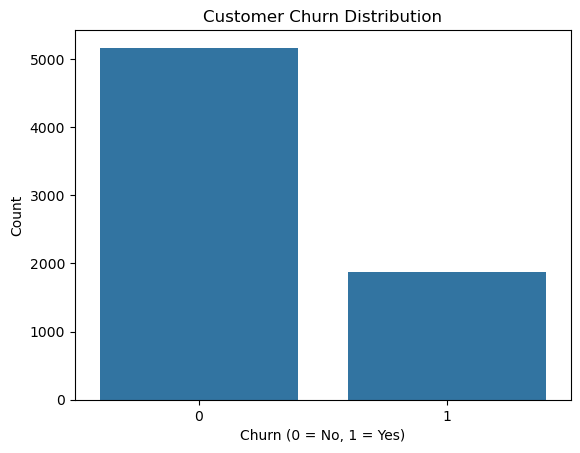

Churn
0    5163
1    1869
Name: count, dtype: int64
Churn
0    73.421502
1    26.578498
Name: proportion, dtype: float64


In [93]:
import seaborn as sns           
import matplotlib.pyplot as plt 
sns.countplot(x='Churn', data=df)   
plt.title("Customer Churn Distribution")  
plt.xlabel("Churn (0 = No, 1 = Yes)")     
plt.ylabel("Count")                       
plt.show()                                
print(df['Churn'].value_counts())       
print(df['Churn'].value_counts(normalize=True) * 100)  

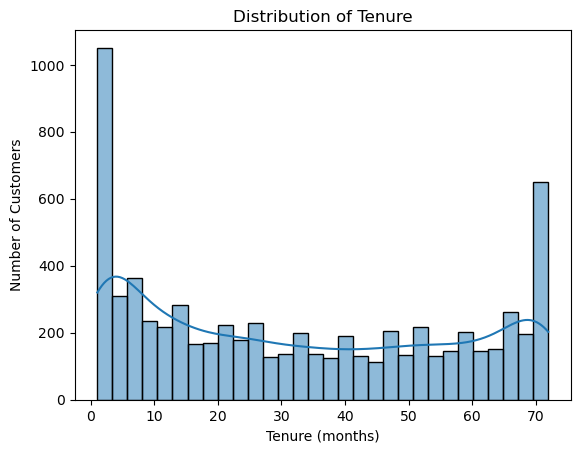

In [94]:
sns.histplot(df['tenure'], kde=True, bins=30)   
plt.title("Distribution of Tenure")
plt.xlabel("Tenure (months)")
plt.ylabel("Number of Customers")
plt.show()

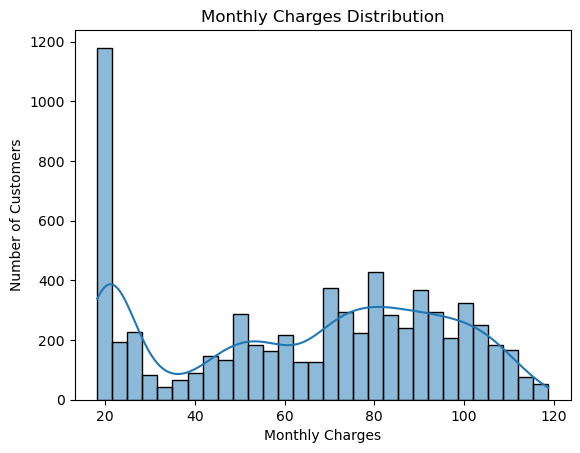

In [95]:
sns.histplot(df['MonthlyCharges'], kde=True, bins=30)
plt.title("Monthly Charges Distribution")
plt.xlabel("Monthly Charges")
plt.ylabel("Number of Customers")
plt.show()

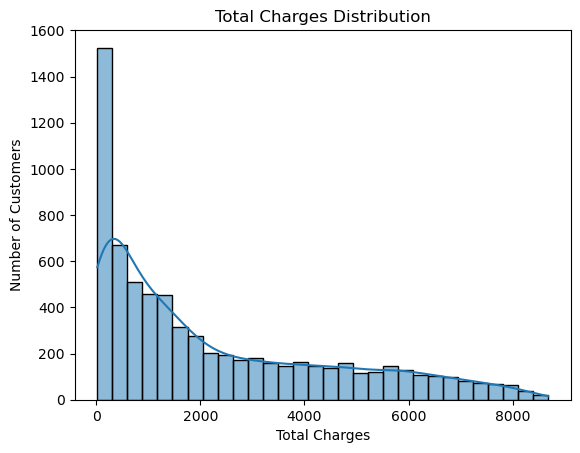

In [96]:
sns.histplot(df['TotalCharges'], kde=True, bins=30)
plt.title("Total Charges Distribution")
plt.xlabel("Total Charges")
plt.ylabel("Number of Customers")
plt.show()

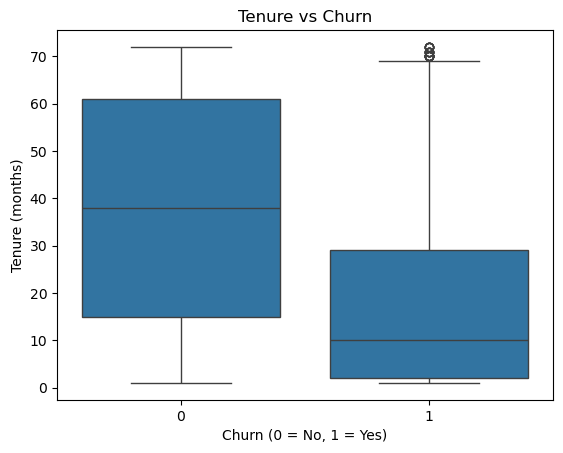

In [97]:
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title("Tenure vs Churn")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Tenure (months)")
plt.show()

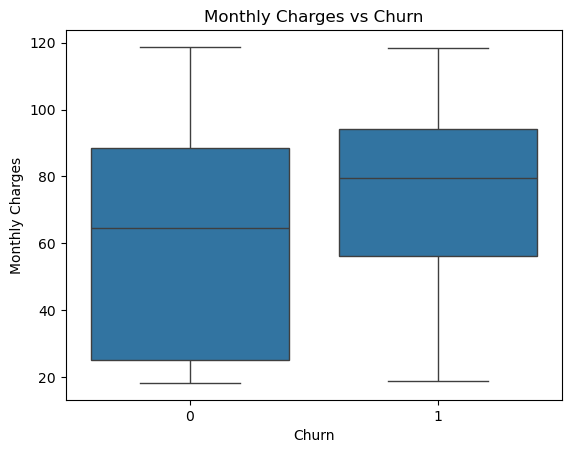

In [98]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title("Monthly Charges vs Churn")
plt.xlabel("Churn")
plt.ylabel("Monthly Charges")
plt.show()

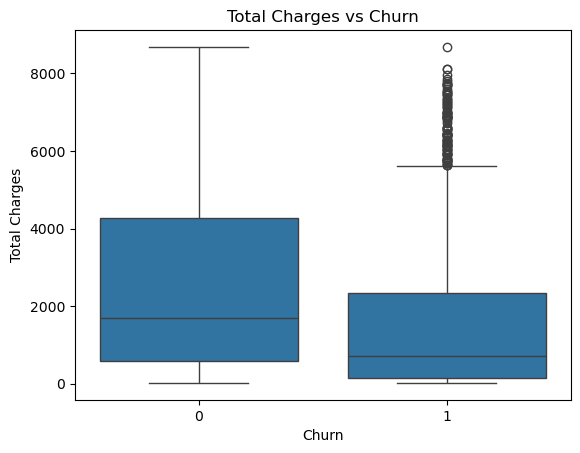

In [99]:
sns.boxplot(x='Churn', y='TotalCharges', data=df)
plt.title("Total Charges vs Churn")
plt.xlabel("Churn")
plt.ylabel("Total Charges")
plt.show()

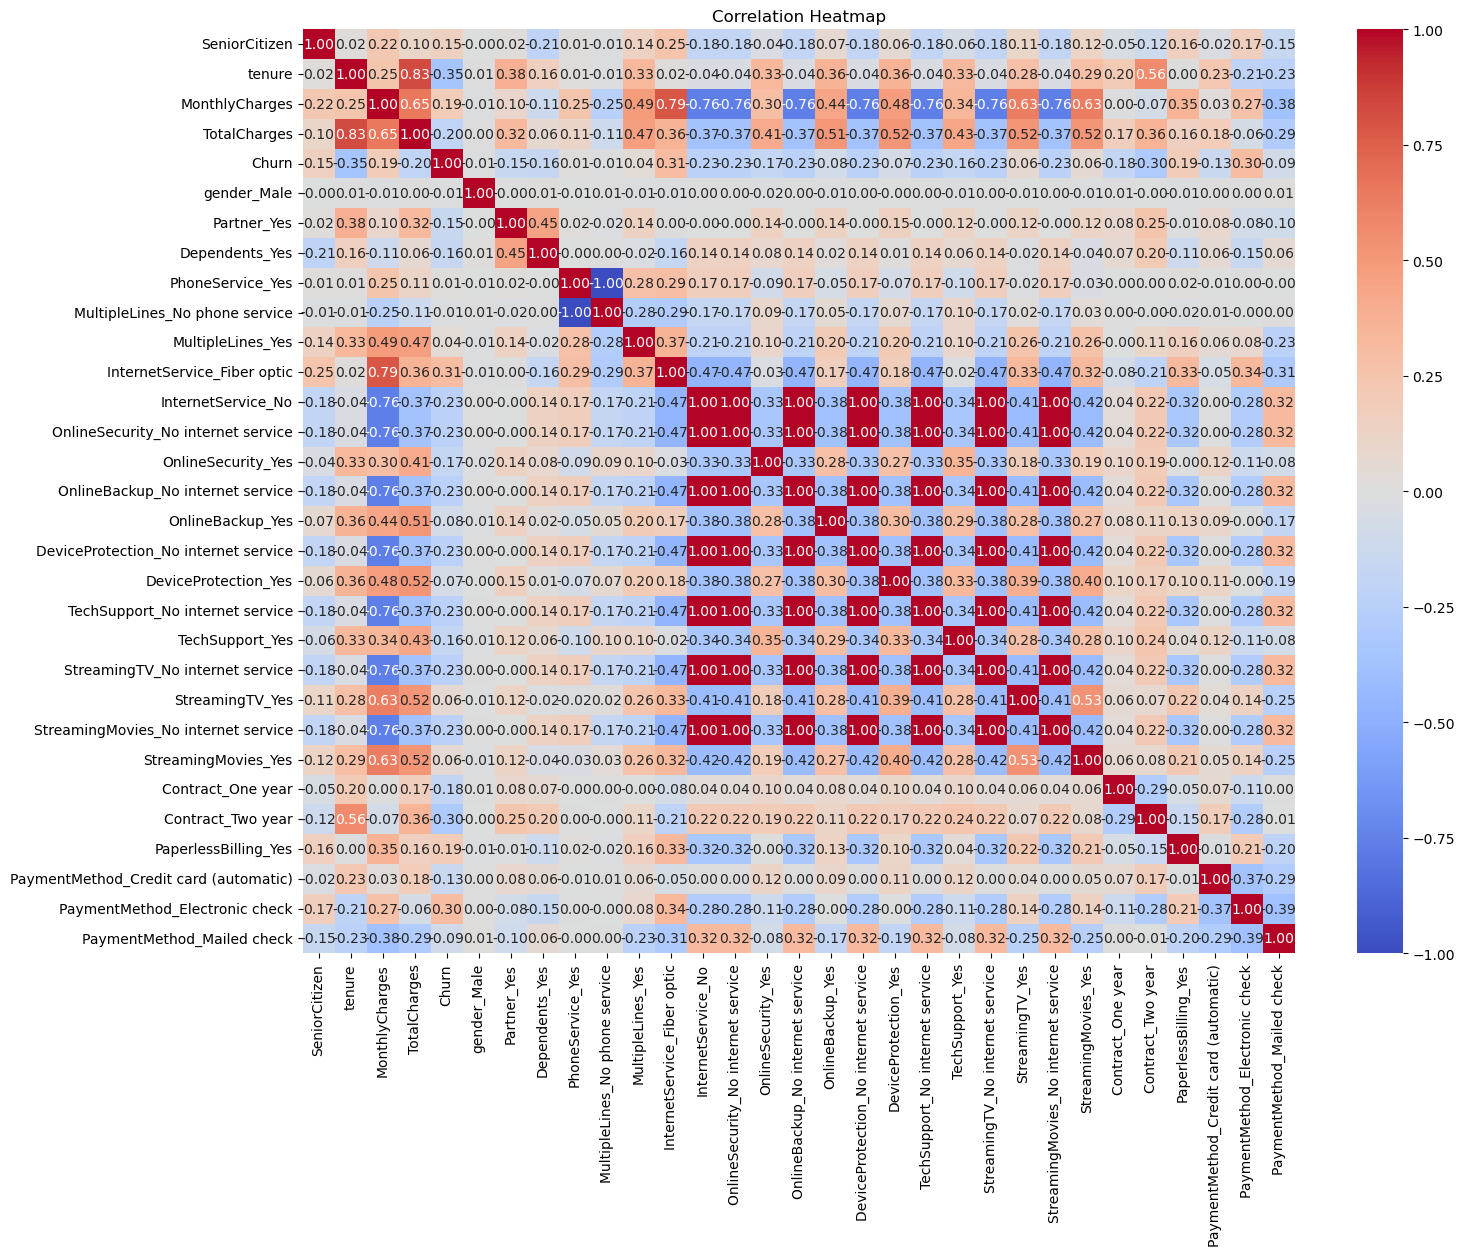

In [100]:
df_corr = df.copy()
df_corr = df_corr.astype(int)
plt.figure(figsize=(16, 12))                 
sns.heatmap(df_corr.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

## 4. Train-Test Split

To evaluate model performance fairly, we split our dataset into:

- **Training set** (typically 80%): Used to train the model.
- **Test set** (typically 20%): Used to evaluate how well the model performs on unseen data.

This ensures our model generalizes well and avoids overfitting to the training data.


In [101]:
from sklearn.model_selection import train_test_split
X = df.drop('Churn', axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (5625, 30)
X_test shape: (1407, 30)
y_train shape: (5625,)
y_test shape: (1407,)


## 5. Model Training and Evaluation

We start with Logistic Regression to build a baseline model. The model is trained on the training set and evaluated using the test set.

Evaluation metrics used:

- **Accuracy**: Overall correctness of the model.
- **Precision**: Correct positive predictions out of all positive predictions.
- **Recall**: Correct positive predictions out of all actual positives (important for churn).
- **F1 Score**: Harmonic mean of precision and recall.
- **Confusion Matrix**: Breakdown of true vs. predicted labels.

These metrics help assess how well the model is performing and identify areas for improvement.


In [102]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8038379530916845
Precision: 0.6475903614457831
Recall: 0.5748663101604278
F1 Score: 0.6090651558073654
Confusion Matrix:
 [[916 117]
 [159 215]]


## 6. ML Pipeline (Applied to Logistic Regression)

To streamline the preprocessing and training steps, we created a Machine Learning Pipeline for Logistic Regression.

Benefits:
- Combines preprocessing (scaling, encoding) and modeling in one flow.
- Reduces code duplication.
- Easier to deploy and maintain.

We used Scikit-learn’s `Pipeline` and `ColumnTransformer` to chain preprocessing and modeling steps.


In [103]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
X = df.drop('Churn', axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(max_iter=500))
])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7874911158493249
Precision: 0.6205787781350482
Recall: 0.516042780748663
F1 Score: 0.5635036496350365
Confusion Matrix:
 [[915 118]
 [181 193]]


## 7. Trying Other Classification Models

To compare performance and ensure robustness, we try additional models such as:

- Random Forest
- Decision Tree
- Support Vector Machine (SVM)
- K-Nearest Neighbors (KNN)
- Gradient Boosting

Each model is trained and evaluated using the same metrics. This step improves our understanding of which algorithms work best for churn prediction.


In [104]:
from sklearn.ensemble import RandomForestClassifier
pipeline_rf = Pipeline([
    ('scaler', StandardScaler()), 
    ('model', RandomForestClassifier(random_state=42, n_estimators=100))
])
pipeline_rf.fit(X_train, y_train)
y_pred_rf = pipeline_rf.predict(X_test)
print("Random Forest Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Random Forest Performance:
Accuracy: 0.7846481876332623
Precision: 0.6254416961130742
Recall: 0.4732620320855615
F1 Score: 0.5388127853881278
Confusion Matrix:
 [[927 106]
 [197 177]]


In [105]:
from sklearn.ensemble import RandomForestClassifier
pipeline_rf_tuned = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestClassifier(
        random_state=42, 
        n_estimators=100, 
        class_weight='balanced'
    ))
])
pipeline_rf_tuned.fit(X_train, y_train)
y_pred_tuned = pipeline_rf_tuned.predict(X_test)
print("Tuned Random Forest Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_tuned))
print("Precision:", precision_score(y_test, y_pred_tuned))
print("Recall:", recall_score(y_test, y_pred_tuned))
print("F1 Score:", f1_score(y_test, y_pred_tuned))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tuned))

Tuned Random Forest Performance:
Accuracy: 0.7839374555792467
Precision: 0.6305970149253731
Recall: 0.45187165775401067
F1 Score: 0.5264797507788161
Confusion Matrix:
 [[934  99]
 [205 169]]


In [106]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
y_proba = pipeline_rf_tuned.predict_proba(X_test)[:, 1]
threshold = 0.3
y_pred_threshold = (y_proba >= threshold).astype(int)
print(f"Performance at threshold = {threshold}:")
print("Accuracy:", accuracy_score(y_test, y_pred_threshold))
print("Precision:", precision_score(y_test, y_pred_threshold))
print("Recall:", recall_score(y_test, y_pred_threshold))
print("F1 Score:", f1_score(y_test, y_pred_threshold))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_threshold))

Performance at threshold = 0.3:
Accuracy: 0.746268656716418
Precision: 0.5160680529300568
Recall: 0.7299465240641712
F1 Score: 0.6046511627906976
Confusion Matrix:
 [[777 256]
 [101 273]]


In [107]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
pipeline_dt = Pipeline([
    ('scaler', StandardScaler()),  
    ('model', DecisionTreeClassifier(random_state=42))
])
pipeline_dt.fit(X_train, y_train)
y_pred_dt = pipeline_dt.predict(X_test)
print("Decision Tree Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt))
print("Recall:", recall_score(y_test, y_pred_dt))
print("F1 Score:", f1_score(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

Decision Tree Performance:
Accuracy: 0.7256574271499645
Precision: 0.4852216748768473
Recall: 0.5267379679144385
F1 Score: 0.5051282051282051
Confusion Matrix:
 [[824 209]
 [177 197]]


In [108]:
from sklearn.svm import SVC
pipeline_svm = Pipeline([
    ('scaler', StandardScaler()), 
    ('model', SVC(random_state=42))
])
pipeline_svm.fit(X_train, y_train)
y_pred_svm = pipeline_svm.predict(X_test)
print("SVM Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Precision:", precision_score(y_test, y_pred_svm))
print("Recall:", recall_score(y_test, y_pred_svm))
print("F1 Score:", f1_score(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

SVM Performance:
Accuracy: 0.7810945273631841
Precision: 0.6161971830985915
Recall: 0.4679144385026738
F1 Score: 0.5319148936170213
Confusion Matrix:
 [[924 109]
 [199 175]]


In [109]:
from sklearn.ensemble import GradientBoostingClassifier
pipeline_gbm = Pipeline([
    ('scaler', StandardScaler()),  
    ('model', GradientBoostingClassifier(random_state=42))
])
pipeline_gbm.fit(X_train, y_train)
y_pred_gbm = pipeline_gbm.predict(X_test)
print("Gradient Boosting Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_gbm))
print("Precision:", precision_score(y_test, y_pred_gbm))
print("Recall:", recall_score(y_test, y_pred_gbm))
print("F1 Score:", f1_score(y_test, y_pred_gbm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gbm))

Gradient Boosting Performance:
Accuracy: 0.7896233120113717
Precision: 0.6392857142857142
Recall: 0.4786096256684492
F1 Score: 0.5474006116207951
Confusion Matrix:
 [[932 101]
 [195 179]]


In [110]:
from sklearn.neighbors import KNeighborsClassifier
pipeline_knn = Pipeline([
    ('scaler', StandardScaler()),  
    ('model', KNeighborsClassifier())
])
pipeline_knn.fit(X_train, y_train)
y_pred_knn = pipeline_knn.predict(X_test)
print("KNN Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Precision:", precision_score(y_test, y_pred_knn))
print("Recall:", recall_score(y_test, y_pred_knn))
print("F1 Score:", f1_score(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))

KNN Performance:
Accuracy: 0.7526652452025586
Precision: 0.536723163841808
Recall: 0.5080213903743316
F1 Score: 0.521978021978022
Confusion Matrix:
 [[869 164]
 [184 190]]


## 8. Hyperparameter Tuning (GridSearchCV)

To improve model performance, we tuned hyperparameters of the logistic regression pipeline using GridSearchCV.

- It searched multiple parameter combinations.
- It used cross-validation to avoid overfitting.
- Best parameters were selected based on scoring metrics.

This improved the final model’s overall reliability.


In [111]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=1000))
])
param_grid = {
    'logreg__C': [0.01, 0.1, 1, 10, 100],   
    'logreg__solver': ['lbfgs', 'liblinear'],  
    'logreg__penalty': ['l2'] 
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1', verbose=1)
grid_search.fit(X_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best hyperparameters: {'logreg__C': 10, 'logreg__penalty': 'l2', 'logreg__solver': 'lbfgs'}
Accuracy: 0.7889125799573561
Precision: 0.6245954692556634
Recall: 0.516042780748663
F1 Score: 0.5651537335285505
Confusion Matrix:
 [[917 116]
 [181 193]]


## 9. Threshold Tuning

To increase Recall (identify more churners), we adjusted the decision threshold from 0.5 to 0.3.

- Recall improved from ~0.51 to ~0.73  
- Precision dropped as a trade-off (typical in imbalanced datasets)  
- This helps in use cases where missing a churner is more costly than a false alarm

This step makes the model more practical for real-world deployment decisions.


## 10. Conclusion

We built a complete end-to-end churn prediction system:

- Performed data cleaning and preprocessing  
- Explored the dataset through EDA  
- Trained a Logistic Regression model  
- Used Pipelines and Hyperparameter Tuning for efficiency and performance  
- Tried other models like Random Forest, SVM, KNN, etc. for versatility  
- Tuned the threshold to increase recall, making it business-friendly

This project demonstrates a well-rounded machine learning workflow suitable for production or showcasing on your resume.
